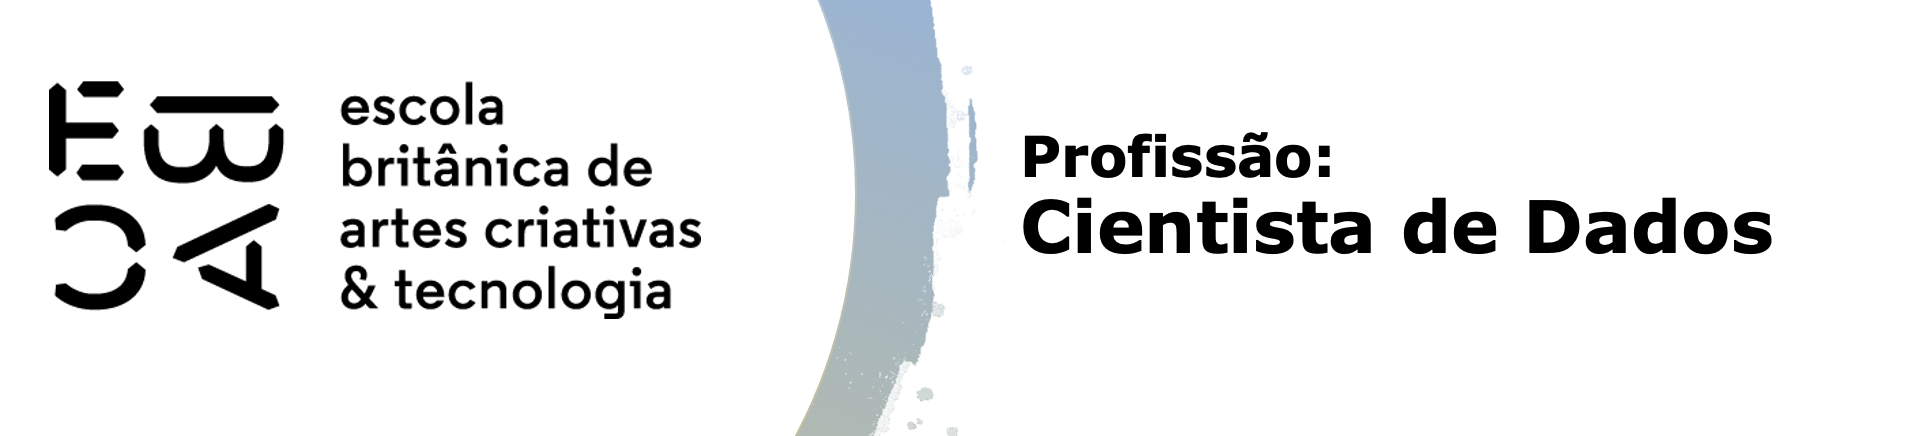

# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

In [2]:
X_train = pd.read_csv('./output/Xtrain.csv')
X_train = X_train.loc[:,'Subject':'angle(Z,gravityMean)'].set_index(['Subject'], append=True)
X_train= X_train.fillna(method='ffill')
X_train= X_train.fillna(method='bfill')
X_train.head(5)

,,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
,Subject,,,,,,,,,,,,,,,,,,,,,
0,1,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.091262,-0.484347,-0.782851,-0.999865,-0.999932,-0.999973,-0.999970,-0.999930,-0.999959,-0.999929
1,1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.999784,-0.999782,-0.999830,-0.999899,-0.999883,-0.999783,-0.999828,-0.999908,-0.999856,-0.999988
2,1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.999862,-0.999674,-0.999906,-0.999831,-0.999863,-0.999676,-0.999903,-0.999954,-0.999988,-0.999990
3,1,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.999950,-0.999948,-0.999877,-0.999860,-0.999948,-0.999946,-0.999931,-0.999989,-0.999992,-0.999993
4,1,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.999865,-0.999918,-0.999911,-0.999908,-0.999864,-0.999933,-0.999926,-0.999993,-0.999996,-0.999988


In [3]:
y_train = pd.read_csv('./output/y_train.csv')
y_train = y_train[['0']]

In [4]:
X_test = pd.read_csv('./output/Xtest.csv')
X_test = X_test.loc[:,'Subject':'angle(Z,gravityMean)'].set_index(['Subject'], append=True)
X_test = X_test.fillna(method='ffill')
X_test = X_test.fillna(method='bfill')
X_test.head(5)


,,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
,Subject,,,,,,,,,,,,,,,,,,,,,
0,2,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.395423,-0.698762,-0.387457,-0.786394,-0.485654,-0.786815,-0.994629,-0.990469,-0.992778,-0.995680
1,2,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.997180,-0.997515,-0.996846,-0.998916,-0.999560,-0.999471,-0.999293,-0.999210,-0.999241,-0.999714
2,2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.999958,-0.999584,-0.999925,-0.999688,-0.999836,-0.999955,-0.999981,-0.999984,-0.999878,-0.999841
3,2,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.999850,-0.999921,-0.999957,-0.999997,-0.999419,-0.999831,-0.999865,-0.999975,-0.999420,-0.999908
4,2,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.999897,-0.999936,-0.999630,-0.999942,-0.999619,-0.999858,-0.999988,-0.999981,-0.999969,-0.999885


In [5]:
y_test = pd.read_csv('./output/y_test.csv')
y_test = y_test[['0']]

### 2. Calcule os ```ccp_alphas```. 

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

In [6]:
X3_train = X_train[['tBodyAcc-max()-X','tBodyAcc-std()-Y', 'tBodyAccJerk-sma()']]
X3_test = X_test[['tBodyAcc-max()-X','tBodyAcc-std()-Y', 'tBodyAccJerk-sma()']]

In [7]:
%%time
clf = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20).fit(X3_train, y_train)

CPU times: user 50.5 ms, sys: 3.75 ms, total: 54.3 ms
Wall time: 54.3 ms


In [8]:
path = clf.cost_complexity_pruning_path(X3_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [9]:
ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])
ccp_alphas

array([0.00000000e+00, 6.96674540e-06, 7.41913147e-06, 7.64604257e-06,
       8.04720609e-06, 9.13418683e-06, 9.55049012e-06, 1.10593595e-05,
       1.16456378e-05, 1.51130456e-05, 1.78489527e-05, 2.04026115e-05,
       2.04404642e-05, 2.85688505e-05, 3.40043526e-05, 3.64866377e-05,
       3.70927894e-05, 4.18440600e-05, 4.53066123e-05, 4.76060936e-05,
       5.04566804e-05, 5.17599406e-05, 6.13822159e-05, 6.24099767e-05,
       6.56511614e-05, 6.60099748e-05, 6.73904442e-05, 6.77875386e-05,
       6.90957838e-05, 7.41495120e-05, 7.52719155e-05, 7.55804213e-05,
       7.75103998e-05, 8.70294184e-05, 8.73905232e-05, 8.84113166e-05,
       8.99469116e-05, 9.51502061e-05, 9.87451069e-05, 1.01559666e-04,
       1.05842584e-04, 1.07462808e-04, 1.14041006e-04, 1.15280707e-04,
       1.16367947e-04, 1.16371386e-04, 1.20362726e-04, 1.20947239e-04,
       1.22130732e-04, 1.22415669e-04, 1.23337336e-04, 1.24585748e-04,
       1.32896664e-04, 1.33665643e-04, 1.34358718e-04, 1.38026600e-04,
      

### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

In [10]:
clf = DecisionTreeClassifier(random_state = 2360873)
clf

DecisionTreeClassifier(random_state=2360873)

In [11]:
grid_parametros = {'ccp_alpha':ccp_alphas[::10]}
grid_parametros

{'ccp_alpha': array([0.00000000e+00, 1.78489527e-05, 5.04566804e-05, 7.52719155e-05,
        1.05842584e-04, 1.23337336e-04, 1.67058105e-04, 1.88141200e-04,
        2.30222181e-04, 2.51974654e-04, 2.78080905e-04, 3.22451572e-04,
        3.62485608e-04, 4.11233924e-04, 4.93622833e-04, 5.95954996e-04,
        7.48736126e-04, 9.43234517e-04, 1.54585403e-03, 3.66535886e-03])}

In [12]:
%%time
grid = GridSearchCV(estimator = clf, param_grid = grid_parametros, scoring = None, cv = 10, verbose=100)
grid.fit(X3_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV 1/10; 1/20] START ccp_alpha=0.0.............................................
[CV 1/10; 1/20] END ..............ccp_alpha=0.0;, score=0.539 total time=   0.0s
[CV 2/10; 1/20] START ccp_alpha=0.0.............................................
[CV 2/10; 1/20] END ..............ccp_alpha=0.0;, score=0.546 total time=   0.0s
[CV 3/10; 1/20] START ccp_alpha=0.0.............................................
[CV 3/10; 1/20] END ..............ccp_alpha=0.0;, score=0.503 total time=   0.0s
[CV 4/10; 1/20] START ccp_alpha=0.0.............................................
[CV 4/10; 1/20] END ..............ccp_alpha=0.0;, score=0.521 total time=   0.0s
[CV 5/10; 1/20] START ccp_alpha=0.0.............................................
[CV 5/10; 1/20] END ..............ccp_alpha=0.0;, score=0.512 total time=   0.0s
[CV 6/10; 1/20] START ccp_alpha=0.0.............................................
[CV 6/10; 1/20] END ..............ccp_alpha=0.

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=2360873),
             param_grid={'ccp_alpha': array([0.00000000e+00, 1.78489527e-05, 5.04566804e-05, 7.52719155e-05,
       1.05842584e-04, 1.23337336e-04, 1.67058105e-04, 1.88141200e-04,
       2.30222181e-04, 2.51974654e-04, 2.78080905e-04, 3.22451572e-04,
       3.62485608e-04, 4.11233924e-04, 4.93622833e-04, 5.95954996e-04,
       7.48736126e-04, 9.43234517e-04, 1.54585403e-03, 3.66535886e-03])},
             verbose=100)

In [13]:
resultados=pd.DataFrame(grid.cv_results_)
resultados.tail()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
15,0.033769,0.001498,0.001305,0.000157,0.000596,{'ccp_alpha': 0.0005959549955220078},0.577446,0.573370,0.586395,0.591837,0.548299,0.604082,0.571429,0.634014,0.620408,0.646259,0.595354,0.029108,4
16,0.034492,0.001705,0.001307,0.000168,0.000749,{'ccp_alpha': 0.0007487361255916376},0.585598,0.595109,0.576871,0.598639,0.542857,0.610884,0.586395,0.650340,0.631293,0.646259,0.602424,0.031514,1
17,0.037705,0.004462,0.001645,0.000546,0.000943,{'ccp_alpha': 0.000943234516723946},0.559783,0.581522,0.583673,0.595918,0.567347,0.585034,0.590476,0.647619,0.625850,0.639456,0.597668,0.028392,3
18,0.034388,0.002225,0.001299,0.000193,0.001546,{'ccp_alpha': 0.0015458540306097328},0.569293,0.572011,0.544218,0.600000,0.571429,0.606803,0.580952,0.623129,0.629932,0.616327,0.591409,0.026501,6
19,0.032855,0.001347,0.001190,0.000089,0.003665,{'ccp_alpha': 0.0036653588617614544},0.595109,0.588315,0.572789,0.594558,0.576871,0.597279,0.586395,0.598639,0.646259,0.659864,0.601608,0.027125,2


In [14]:
grid.best_score_

0.6024243936705117

### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

In [15]:
melhor_ccp = resultados.iloc[grid.best_index_,4]
melhor_ccp

0.0007487361255916376

In [16]:
clf = DecisionTreeClassifier(random_state = 2360873, ccp_alpha = melhor_ccp).fit(X3_train, y_train)

In [17]:
clf.score(X3_test,y_test)

0.6046827281981676

/opt/anaconda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


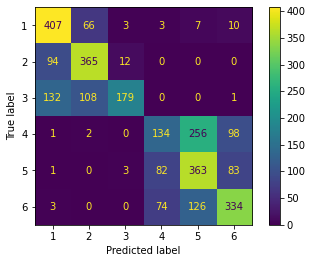

In [18]:
plot_confusion_matrix(clf, X3_test, y_test);

In [19]:
407+365+179+134+363+334

1782

### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Fala uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

In [20]:
class1 = 94+132+1+1+3
class2 = 66+108+2+0+0
class3 = 3+12+0+3+0
class4 = 3+0+0+82+74
class5 = 7+0+0+256+126
class6 = 10+0+1+98+83

print(f"A classe 1 teve {class1} casos de preditos errados.")
print(f"A classe 2 teve {class2} casos de preditos errados.")
print(f"A classe 3 teve {class3} casos de preditos errados.")
print(f"A classe 4 teve {class4} casos de preditos errados.")
print(f"A classe 5 teve {class5} casos de preditos errados.")
print(f"A classe 6 teve {class6} casos de preditos errados.")

A classe 1 teve 231 casos de preditos errados.
A classe 2 teve 176 casos de preditos errados.
A classe 3 teve 18 casos de preditos errados.
A classe 4 teve 159 casos de preditos errados.
A classe 5 teve 389 casos de preditos errados.
A classe 6 teve 192 casos de preditos errados.


In [21]:
# Observe que a classe 5 foi a que apresentou maior número de preditos errados. Assim sendo, adotaremos esta classe para se criar uma variável binária.

In [22]:
y_train.value_counts()

0
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
dtype: int64

In [23]:
y_train5 = y_train.copy()

In [24]:
y_train5.loc[y_train5['0'] != 5, 'y_class5_train']='0'
y_train5.loc[y_train5['0'] == 5, 'y_class5_train']='5'
y_train5 = y_train5.drop(['0'], axis=1)

In [25]:
y_train5.value_counts()

y_class5_train
0                 5978
5                 1374
dtype: int64

In [26]:
clf = DecisionTreeClassifier(random_state = 2360873, min_samples_leaf= 20, max_depth=4).fit(X_train, y_train5)  

In [32]:
importancia = pd.DataFrame(clf.feature_importances_, index=X_train.columns, columns=['Importancia'])
importancia.sort_values(by='Importancia', ascending = False, inplace=True)
#importancia.head(10).plot(kind='bar', figsize = (8,6))
importancia.head()

,Importancia
tBodyAcc-entropy()-X,0.362551
"tGravityAcc-arCoeff()-Z,4",0.293577
tBodyAcc-energy()-X,0.175153
"tGravityAcc-arCoeff()-Y,3",0.060361
tBodyAccJerk-entropy()-X,0.049584


In [33]:
X6_train = X_train[['tBodyAcc-max()-X','tBodyAcc-std()-Y', 'tBodyAccJerk-sma()', 'tBodyAcc-entropy()-X','tGravityAcc-arCoeff()-Z,4','tBodyAcc-energy()-X']]
X6_test = X_test[['tBodyAcc-max()-X','tBodyAcc-std()-Y', 'tBodyAccJerk-sma()', 'tBodyAcc-entropy()-X','tGravityAcc-arCoeff()-Z,4','tBodyAcc-energy()-X']]

In [36]:
%%time
clf = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20).fit(X6_train, y_train)

CPU times: user 61.7 ms, sys: 55 µs, total: 61.8 ms
Wall time: 60.8 ms


In [37]:
path = clf.cost_complexity_pruning_path(X6_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [42]:
ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])
ccp_alphas

array([0.00000000e+00, 6.80087051e-06, 7.12472149e-06, 7.81376612e-06,
       8.16104461e-06, 9.06782735e-06, 1.08258755e-05, 1.12766571e-05,
       1.16014850e-05, 1.21232909e-05, 1.25349378e-05, 2.29432682e-05,
       2.69645795e-05, 2.74264614e-05, 2.83369605e-05, 3.07517623e-05,
       3.08610931e-05, 3.22387834e-05, 3.95806936e-05, 4.10451708e-05,
       4.14741612e-05, 4.21806800e-05, 4.24777859e-05, 4.65508860e-05,
       4.72137357e-05, 4.87672178e-05, 4.90116736e-05, 4.92104226e-05,
       5.14844065e-05, 5.70860949e-05, 5.78740745e-05, 5.84029558e-05,
       6.12078346e-05, 7.31601951e-05, 7.54001274e-05, 7.54278366e-05,
       8.73087874e-05, 8.76765717e-05, 8.84113166e-05, 8.96394062e-05,
       9.26382896e-05, 9.75359790e-05, 1.05873011e-04, 1.08813928e-04,
       1.21025926e-04, 1.29216540e-04, 1.32283599e-04, 1.49129718e-04,
       1.59427209e-04, 1.67029399e-04, 1.70021763e-04, 1.73150368e-04,
       1.74859159e-04, 1.84200723e-04, 1.87688540e-04, 1.94288629e-04,
      

In [47]:
clf = DecisionTreeClassifier(random_state = 2360873)
clf

DecisionTreeClassifier(random_state=2360873)

In [48]:
grid_parametros = {'ccp_alpha':ccp_alphas[::10]}
grid_parametros

{'ccp_alpha': array([0.00000000e+00, 1.25349378e-05, 4.14741612e-05, 5.78740745e-05,
        9.26382896e-05, 1.70021763e-04, 2.25706466e-04, 3.18741831e-04,
        4.13528256e-04, 4.78276609e-04, 5.26095912e-04, 5.84442394e-04,
        6.46026942e-04, 8.53155034e-04, 1.06874284e-03, 1.36340379e-03,
        1.88017104e-03, 3.63434288e-03, 2.93248074e-02])}

In [49]:
%%time
grid = GridSearchCV(estimator = clf, param_grid = grid_parametros, scoring = None, cv = 10, verbose=100)
grid.fit(X6_train, y_train)

Fitting 10 folds for each of 19 candidates, totalling 190 fits
[CV 1/10; 1/19] START ccp_alpha=0.0.............................................
[CV 1/10; 1/19] END ..............ccp_alpha=0.0;, score=0.649 total time=   0.1s
[CV 2/10; 1/19] START ccp_alpha=0.0.............................................
[CV 2/10; 1/19] END ..............ccp_alpha=0.0;, score=0.594 total time=   0.1s
[CV 3/10; 1/19] START ccp_alpha=0.0.............................................
[CV 3/10; 1/19] END ..............ccp_alpha=0.0;, score=0.582 total time=   0.1s
[CV 4/10; 1/19] START ccp_alpha=0.0.............................................
[CV 4/10; 1/19] END ..............ccp_alpha=0.0;, score=0.624 total time=   0.1s
[CV 5/10; 1/19] START ccp_alpha=0.0.............................................
[CV 5/10; 1/19] END ..............ccp_alpha=0.0;, score=0.627 total time=   0.1s
[CV 6/10; 1/19] START ccp_alpha=0.0.............................................
[CV 6/10; 1/19] END ..............ccp_alpha=0.

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=2360873),
             param_grid={'ccp_alpha': array([0.00000000e+00, 1.25349378e-05, 4.14741612e-05, 5.78740745e-05,
       9.26382896e-05, 1.70021763e-04, 2.25706466e-04, 3.18741831e-04,
       4.13528256e-04, 4.78276609e-04, 5.26095912e-04, 5.84442394e-04,
       6.46026942e-04, 8.53155034e-04, 1.06874284e-03, 1.36340379e-03,
       1.88017104e-03, 3.63434288e-03, 2.93248074e-02])},
             verbose=100)

In [53]:
resultados=pd.DataFrame(grid.cv_results_)
resultados

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.051419,0.009634,0.001601,0.000416,0.0,{'ccp_alpha': 0.0},0.649457,0.593750,0.582313,0.624490,0.627211,0.608163,0.546939,0.627211,0.657143,0.634014,0.615069,0.031483,14
1,0.044580,0.001646,0.001300,0.000073,0.000013,{'ccp_alpha': 1.2534937805373477e-05},0.649457,0.593750,0.582313,0.624490,0.627211,0.608163,0.546939,0.627211,0.657143,0.634014,0.615069,0.031483,14
2,0.044904,0.002074,0.001294,0.000074,0.000041,{'ccp_alpha': 4.1474161151643465e-05},0.649457,0.593750,0.582313,0.624490,0.627211,0.608163,0.546939,0.627211,0.657143,0.634014,0.615069,0.031483,14
3,0.044391,0.001522,0.001309,0.000213,0.000058,{'ccp_alpha': 5.787407454820861e-05},0.649457,0.593750,0.582313,0.624490,0.627211,0.608163,0.546939,0.627211,0.657143,0.634014,0.615069,0.031483,14
4,0.044943,0.002134,0.001338,0.000164,0.000093,{'ccp_alpha': 9.263828959744599e-05},0.649457,0.593750,0.582313,0.624490,0.627211,0.608163,0.546939,0.627211,0.657143,0.634014,0.615069,0.031483,14
5,0.044965,0.001476,0.001261,0.000057,0.00017,{'ccp_alpha': 0.00017002176278563632},0.660326,0.595109,0.601361,0.632653,0.646259,0.617687,0.553741,0.636735,0.658503,0.642177,0.624455,0.031455,13
6,0.045415,0.001641,0.001275,0.000054,0.000226,{'ccp_alpha': 0.00022570646618524752},0.669837,0.608696,0.609524,0.635374,0.642177,0.619048,0.561905,0.643537,0.670748,0.639456,0.630030,0.030541,12
7,0.046511,0.001805,0.001287,0.000119,0.000319,{'ccp_alpha': 0.00031874183125543297},0.671196,0.625000,0.621769,0.631293,0.655782,0.640816,0.590476,0.648980,0.669388,0.642177,0.639688,0.022928,11
8,0.046316,0.001183,0.001209,0.000050,0.000414,{'ccp_alpha': 0.0004135282562921297},0.684783,0.631793,0.616327,0.629932,0.657143,0.642177,0.575510,0.658503,0.699320,0.638095,0.643358,0.033082,9
9,0.046262,0.001450,0.001209,0.000059,0.000478,{'ccp_alpha': 0.0004782766094534741},0.690217,0.633152,0.609524,0.628571,0.657143,0.642177,0.583673,0.687075,0.684354,0.640816,0.645670,0.033109,7


In [56]:
grid.best_score_

0.6629442102928127

In [57]:
melhor_ccp = resultados.iloc[grid.best_index_,4]
melhor_ccp

0.0008531550341841464

In [58]:
clf = DecisionTreeClassifier(random_state = 2360873, ccp_alpha = melhor_ccp).fit(X6_train, y_train)

In [59]:
clf.score(X6_test,y_test)

0.6481167288768239

/opt/anaconda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


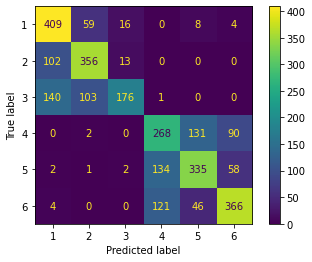

In [60]:
plot_confusion_matrix(clf, X6_test, y_test);

In [61]:
class1a = 102+140+0+2+4
class2a = 59+103+2+1+0
class3a = 16+13+0+2+0
class4a = 0+0+1+134+121
class5a = 0+0+0+131+46
class6a = 4+0+0+90+58

print(f"Anteriormente a classe 1 teve {class1} casos de preditos errados, agora está com {class1a}.")
print(f"Anteriormente a classe 2 teve {class2} casos de preditos errados, agora está com {class2a}.")
print(f"Anteriormente a classe 3 teve {class3} casos de preditos errados, agora está com {class3a}.")
print(f"Anteriormente a classe 4 teve {class4} casos de preditos errados, agora está com {class4a}.")
print(f"Anteriormente a classe 5 teve {class5} casos de preditos errados, agora está com {class5a}.")
print(f"Anteriormente a classe 6 teve {class6} casos de preditos errados, agora está com {class6a}.")

Anteriormente a classe 1 teve 231 casos de preditos errados, agora está com 248.
Anteriormente a classe 2 teve 176 casos de preditos errados, agora está com 165.
Anteriormente a classe 3 teve 18 casos de preditos errados, agora está com 31.
Anteriormente a classe 4 teve 159 casos de preditos errados, agora está com 256.
Anteriormente a classe 5 teve 389 casos de preditos errados, agora está com 177.
Anteriormente a classe 6 teve 192 casos de preditos errados, agora está com 152.


In [62]:
0.6481167288768239/0.6046827281981676

1.0718294051627386

Enfim, ao acrescentar as 3 principais colunas em grau de importância para a classe 5, houve uma redução de preditos errados neste classe (classe 5), sendo que antes apresentava 389 erros preditos e agora 177. Além disso, houve uma melhora de 7,18% no índice de acurácia, passando de 0.604 para 0.648.